## Sparse Grid Density Estimation with the Combination Technique: 
To overcome the curse of dimensionality, sparse grids are used, since full grids
with more than three dimensions are not feasible. The basic idea of sparse grids 
is to omit some points of a full grid while retaining the subspaces that contribute 
most to the overall solution without compromising the overall accuracy. 
These sparse grids can be constructed by using the standard combination technique.
The combination technique is a simpler method for calculating the surpluses of basis 
functions centered on grid points, rather than working directly on sparse grids based 
on the hierarchical basis, by linearly combining a certain sequence of small anisotropic
full grids.

In order to use the new grid operation, the user must pass a $\texttt{DensityEstimation}$
object to the $\texttt{StandardCombi}$ constructor. It is possible to pass either a path
to a $\texttt{.csv}$ file to specify the data set used for density estimation, or to 
pass a $\texttt{NumPy}$ array directly when the grid operation is created. Different
data sets can be created with the $\texttt{scikit-learn}$ package
$\texttt{sklearn.datasets}$ or with the $\texttt{NumPy}$ package $\texttt{random}$, 
which provides random sampling of various different distributions. 
The data is scaled to the range $(0,1)$ in the $\texttt{initialize()}$ function 
that is called when the grid operation is performed. This has to be done because 
the implementation can only handle values between zero and one.

The user can also specify a $\lambda$ value that controls the smoothness of the 
density estimation and helps prevent overfitting when an appropriate value is 
chosen for the specific data set. In addition, the user can specify whether mass 
lumping should be used in the $R$-matrix calculation. 
Here we omit all cases where the basis functions only partially overlap, 
resulting in $R$ being a diagonal matrix. This is feasible because we use the nodal 
basis for the component grids of the combination scheme, for which the linear system 
is solved, where the $R$ matrix is already sparse 
because we have less overlapping basis functions compared to the hierarchical basis. 
This speeds up the calculation because only the diagonal values of the matrix are 
calculated and since the values on the diagonal are all the same, only one value 
on the diagonal needs to be evaluated. This accelerates the solution of the linear 
system $(R+\lambda I) \vec{\alpha} = \vec{b}$, since $R$ becomes a scalar matrix but 
also decreases the accuracy.

After performing the density estimation operation by calling the 
$\texttt{perform_operation}$ method of the $\texttt{StandardCombi}$ object, 
the surpluses of each component grid are calculated and stored in a dictionary. 
These calculated surpluses can then be used to interpolate the density function or 
when plotting the resulting density estimation in 3D or as a contour plot.

### Example with the circle scikit-learn dataset with mass lumping:

0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31)]
Levelvector:  [1 5]
Diagonal value:  0.006944444444444444
B vector:  [0.00739261 0.02428166 0.02760748 0.03050749 0.03585819 0.02928555
 0.01847081 0.00813721 0.01064954 0.00760783 0.00791378 0.00628884
 0.00394833 0.0069766  0.00475386 0.00436771 0.00601414 0.00315068
 0.00458444 0.00640571 0.00644696 0.00692081 0.00995184 0.01003658
 0.01735421 0.02823428 0.03834484 0.02915541 0.01867789 0.0230478
 0.01933397]
Alphas:  [1 5] [1.06453602 3.49655849 3.97547689 4.39307918 5.16357919 4.21711851
 2.65979611 1.17175775 1.53353336 1.09552701 1.13958425 0.90559273
 0.5685589  1.0046306  0.684555

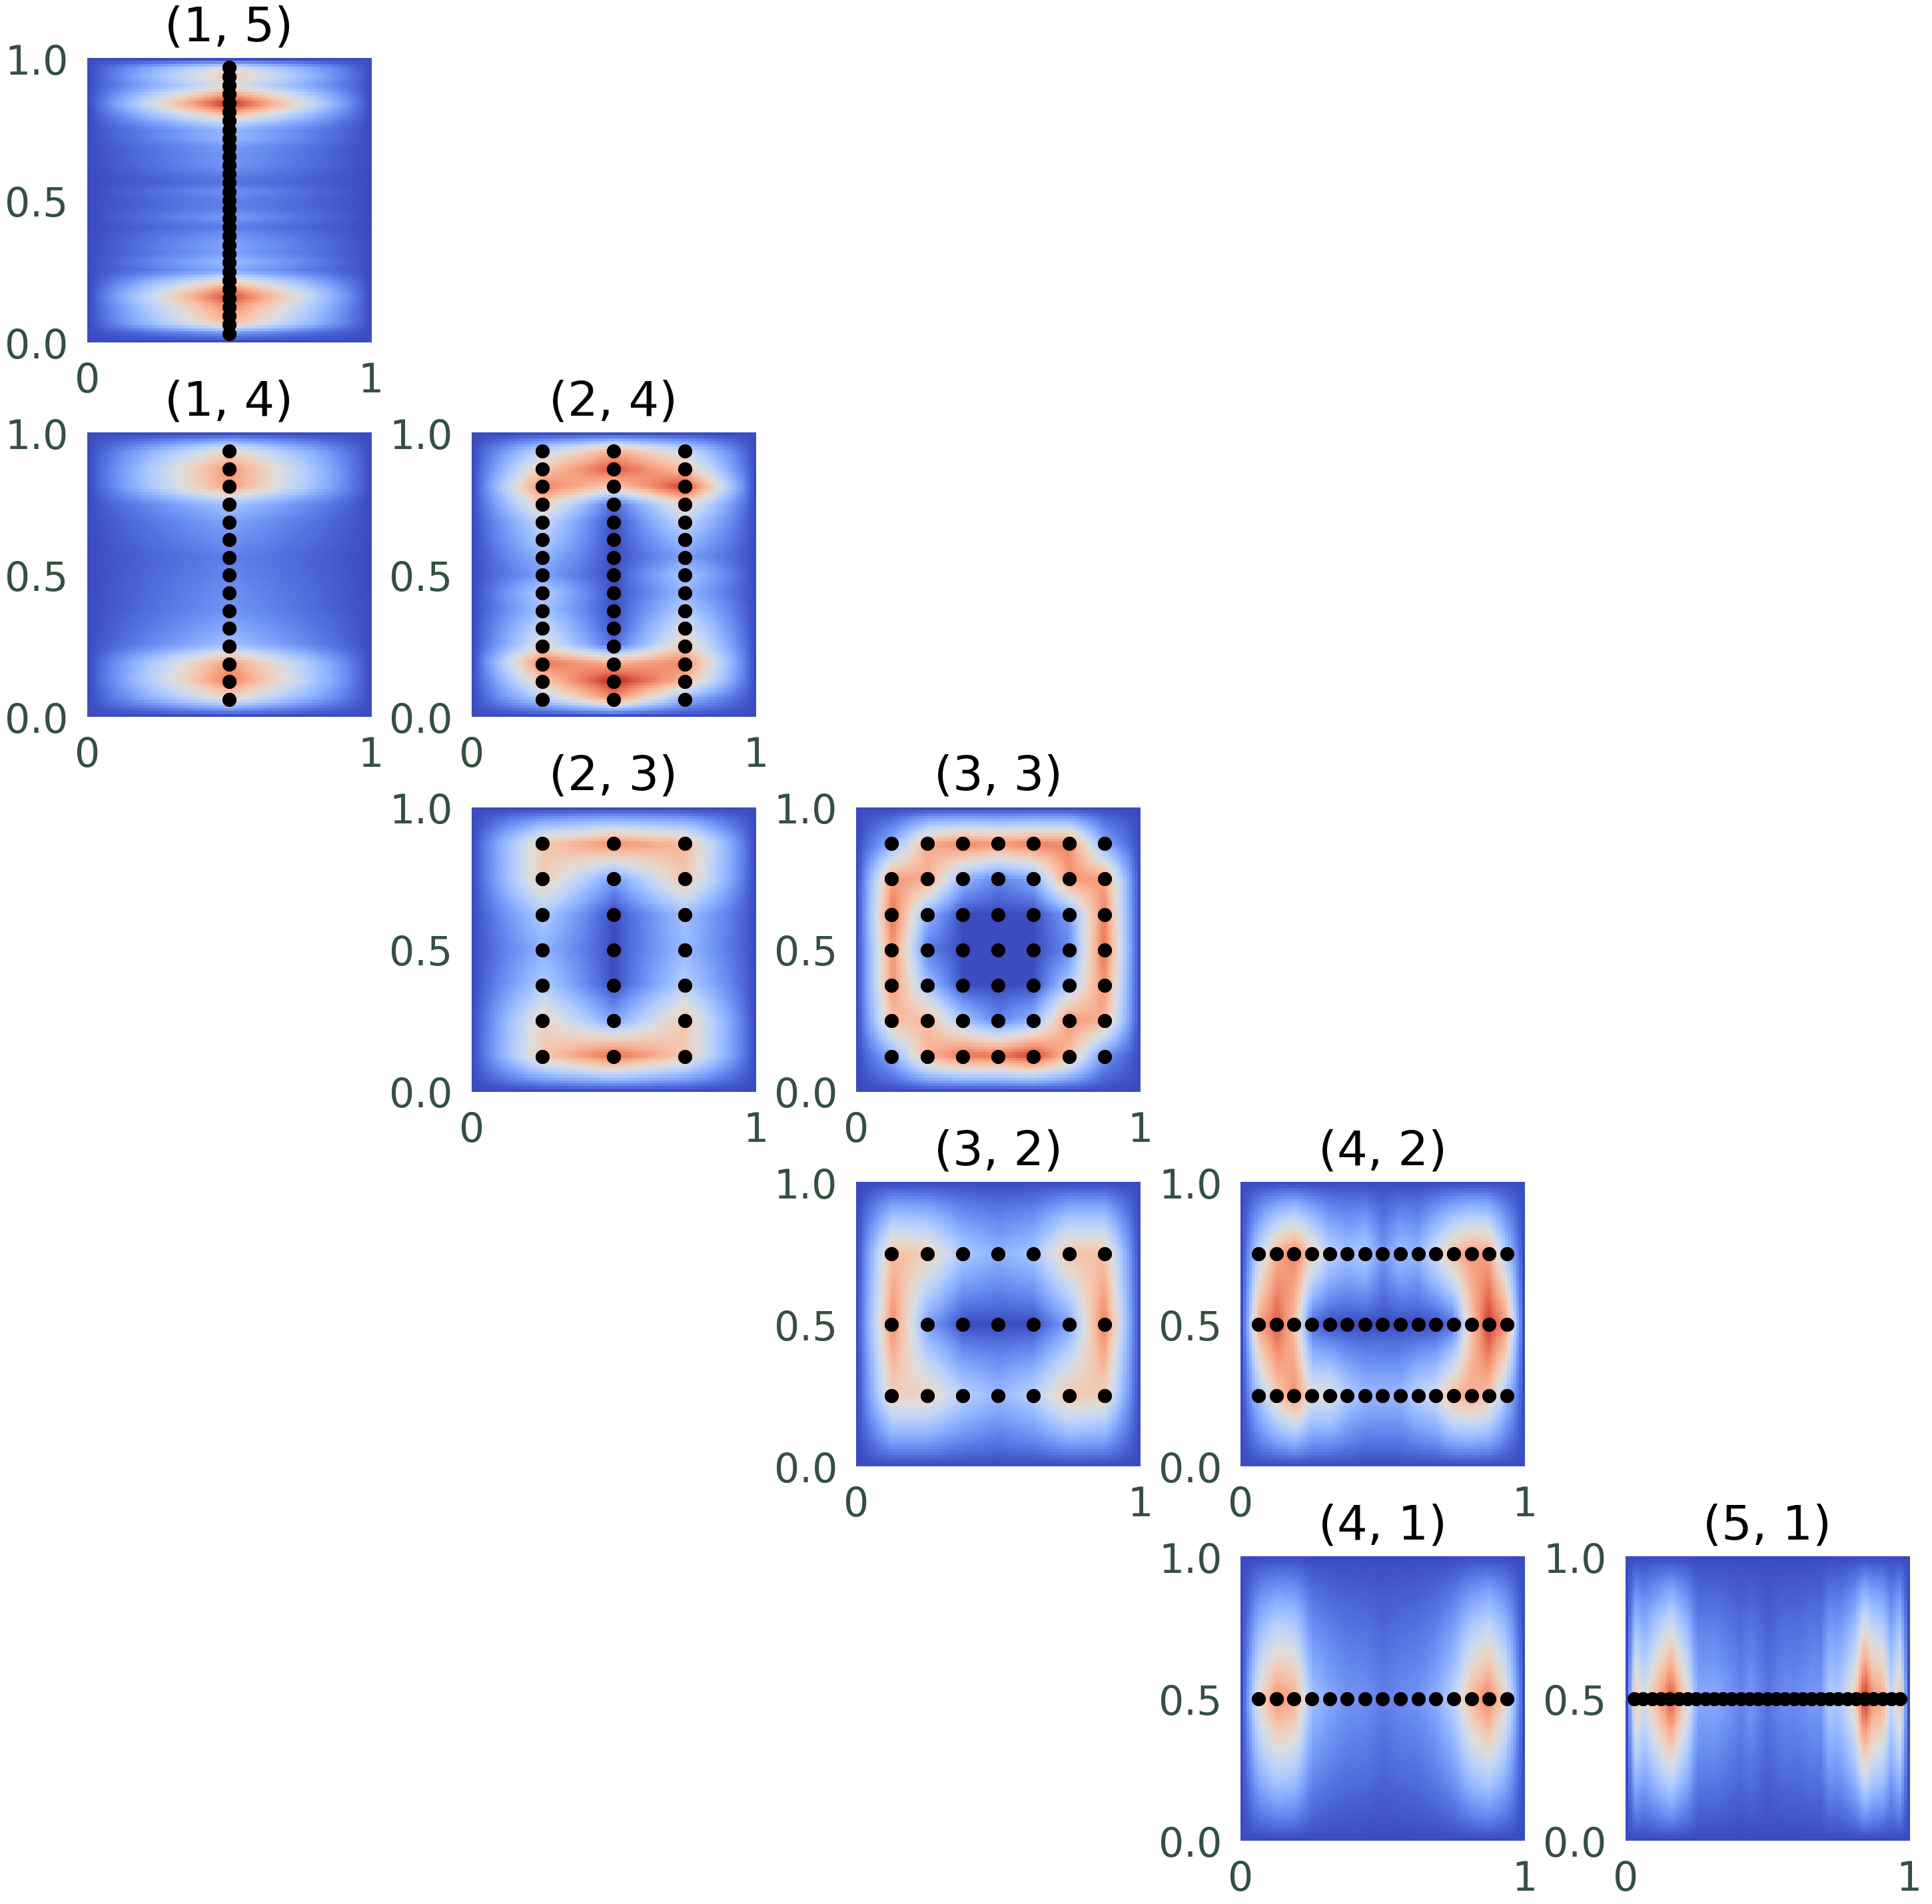

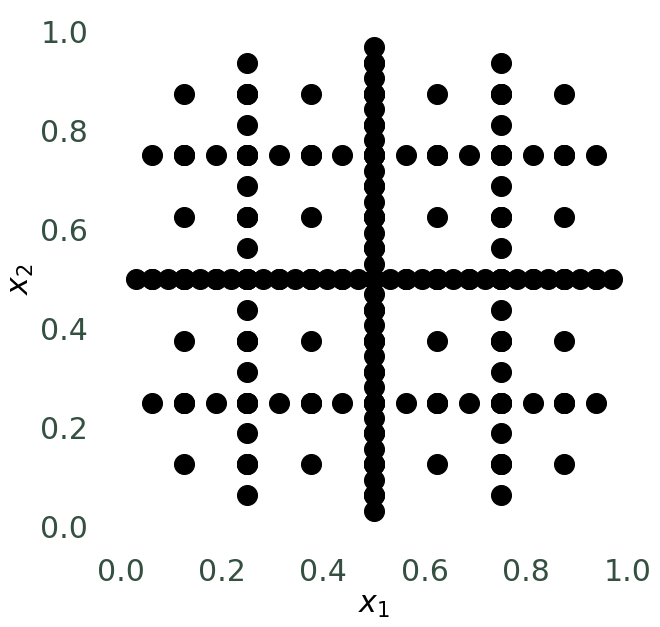

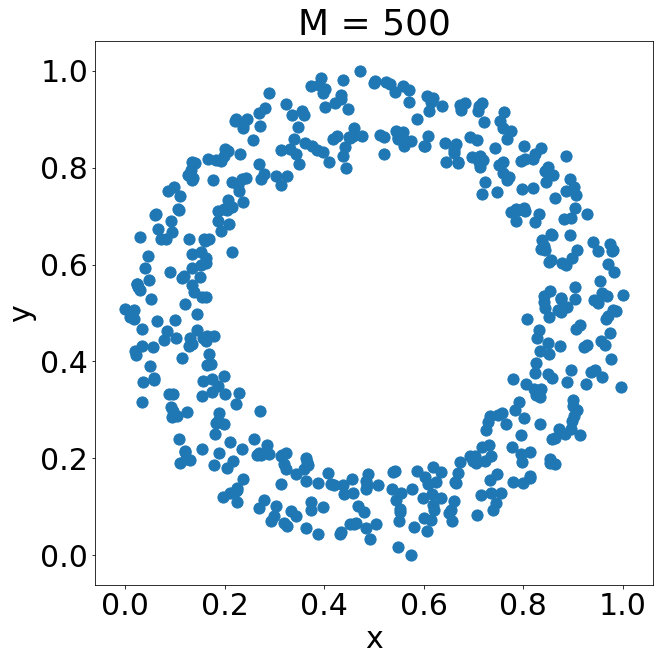

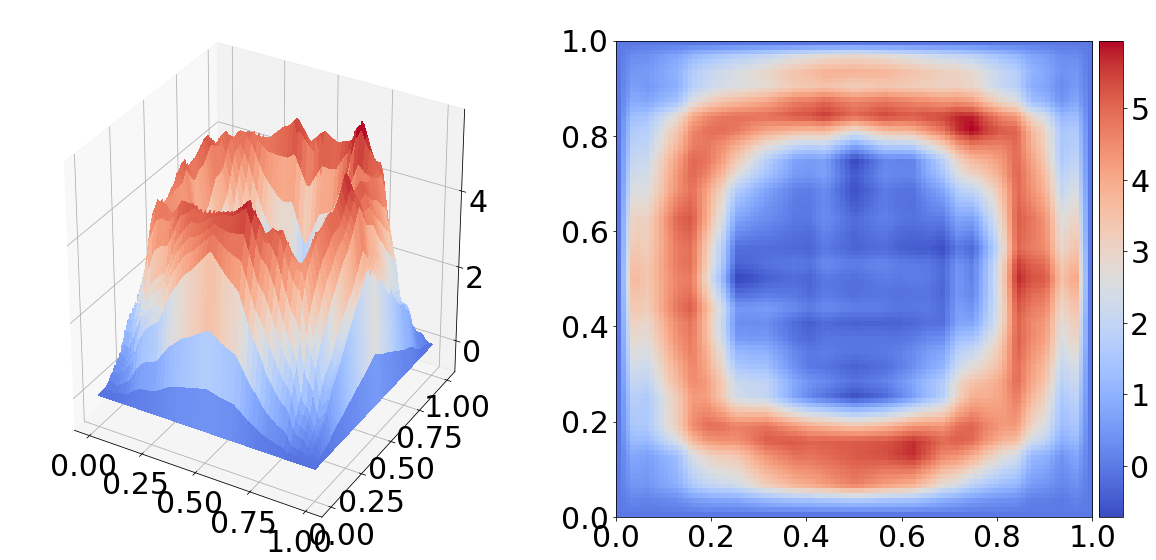

In [1]:
from sys import path
path.append('../src/')
%matplotlib inline
import numpy as np
from ErrorCalculator import *
from GridOperation import *
from StandardCombi import *
from sklearn import datasets

# dimension of the problem
dim = 2

# define size for the generated data sets
size = 500

# define the domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define the data
data = datasets.make_circles(size, noise = 0.05)

# initialize the grid operation
operation = DensityEstimation(data, dim, masslumping=True, lambd= 0.0)

# initialize the StandardCombi with the DE
combiObject = StandardCombi(a, b, operation=operation)

# define the min and max level of the combi grid
minimum_level = 1
maximum_level = 5

# perform the density estimation operation, has to be done before the printing and plotting
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
# when you pass the operation the function also plots the contour plot of each component grid
combiObject.print_resulting_combi_scheme(operation=operation)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(markersize=20)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation:")
# when contour = True, the contour plot is shown next to the 3D plot
combiObject.plot(contour=True)

### Example with numpy random sampling (multivariate Gaussian distribution):

0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31)]
Levelvector:  [1 5]
Diagonal value:  0.006944444444444444
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Result:  0.001736111111111111
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
----------------------------------------------------------------------

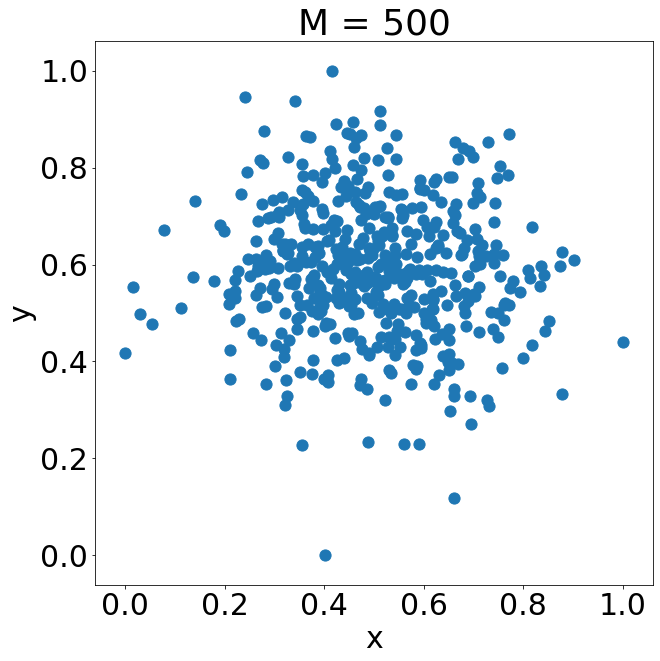

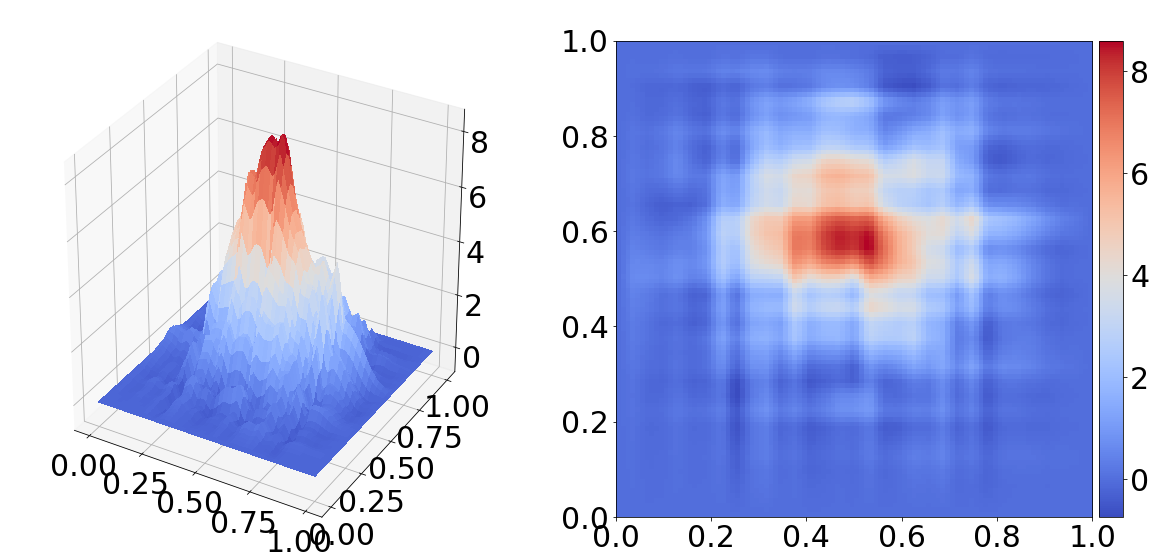

In [2]:
operation.masslumping = False

# multivariate normal distribution
mean = np.array([0.0] * dim)
sigma = np.array([0.25]*dim)
cov = np.diag(sigma**2)
data = np.random.multivariate_normal(mean, cov, size)
operation.data = data

combiObject.perform_operation(minimum_level, maximum_level)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)

### Example with the old faithful geyser dataset with $\lambda = 0.001$:

0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31)]
Levelvector:  [1 5]
Diagonal value:  0.006944444444444444
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Result:  0.001736111111111111
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
----------------------------------------------------------------------

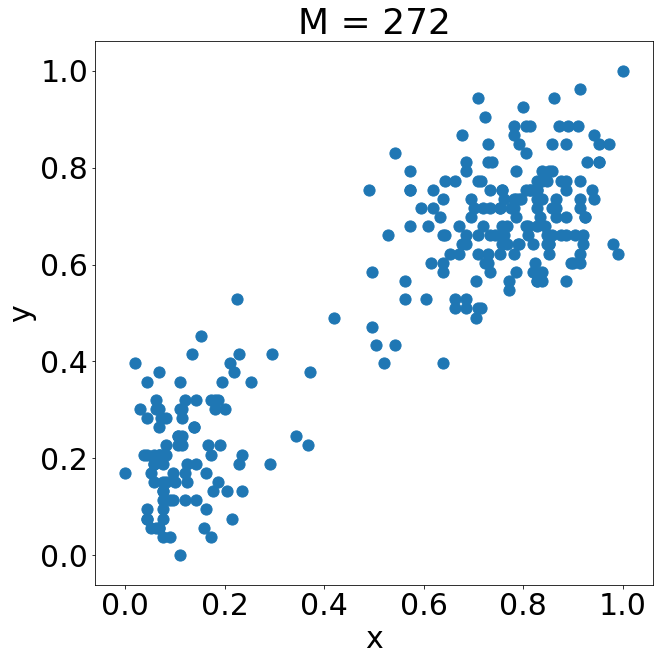

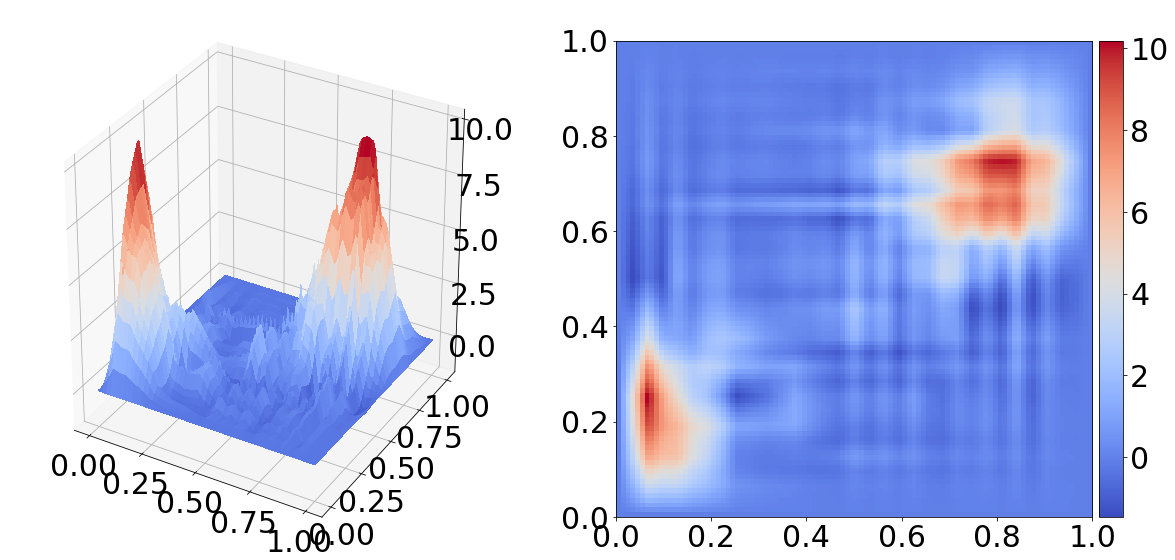

In [3]:
oldFaithfulDataset = "Datasets/faithful.csv"

operation.data = oldFaithfulDataset
combiObject.perform_operation(minimum_level, maximum_level)
print("Plot of dataset:")
operation.plot_dataset()
print("Plot of density estimation")
combiObject.plot(contour=True)